In [2]:
import numpy as np

## NumPy Matrix Multiplication

You've heard a lot about matrix multiplication in the last few videos – now you'll get to see how to do it with NumPy. However, it's important to know that NumPy supports several types of matrix multiplication.

### Element-wise Multiplication
You saw some element-wise multiplication already. You accomplish that with the `multiply` function or the `*` operator. Just to revisit, it would look like this:

In [3]:
m = np.array([[1,2,3],[4,5,6]])
m

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
n = m * 0.25
n

array([[0.25, 0.5 , 0.75],
       [1.  , 1.25, 1.5 ]])

In [6]:
m * n

array([[0.25, 1.  , 2.25],
       [4.  , 6.25, 9.  ]])

In [7]:
np.multiply(m, n)

array([[0.25, 1.  , 2.25],
       [4.  , 6.25, 9.  ]])

### Matrix Product
To find the matrix product, you use NumPy's `matmul` function.

If you have compatible shapes, then it's as simple as this:

In [8]:
a = np.array([[1,2,3,4],[5,6,7,8]])
a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
a.shape

(2, 4)

In [10]:
b = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
b

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [11]:
b.shape

(4, 3)

In [12]:
c = np.matmul(a, b)
c

array([[ 70,  80,  90],
       [158, 184, 210]])

In [13]:
c.shape

(2, 3)

If your matrices have incompatible shapes, you'll get an error, like the following:

In [14]:
np.matmul(b, a)

ValueError: shapes (4,3) and (2,4) not aligned: 3 (dim 1) != 2 (dim 0)

### NumPy's dot function
You may sometimes see NumPy's `dot` function in places where you would expect a `matmul`. It turns out that the results of `dot` and `matmul` are the same _if the matrices are two dimensional_.

So these two results are equivalent:

In [15]:
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [16]:
np.dot(a,a)

array([[ 7, 10],
       [15, 22]])

In [17]:
a.dot(a) # you can call `dot` directly on the `ndarray`

array([[ 7, 10],
       [15, 22]])

In [18]:
np.matmul(a,a)

array([[ 7, 10],
       [15, 22]])

While these functions return the same results for two dimensional data, you should be careful about which you choose when working with other data shapes. You can read more about the differences, and find links to other NumPy functions, in the [matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul) and [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) documentation.

# Transpose

Getting the transpose of a matrix is really easy in NumPy. Simply access its `T` attribute. There is also a `transpose()` function which returns the same thing, but you’ll rarely see that used anywhere because typing `T` is so much easier. :)

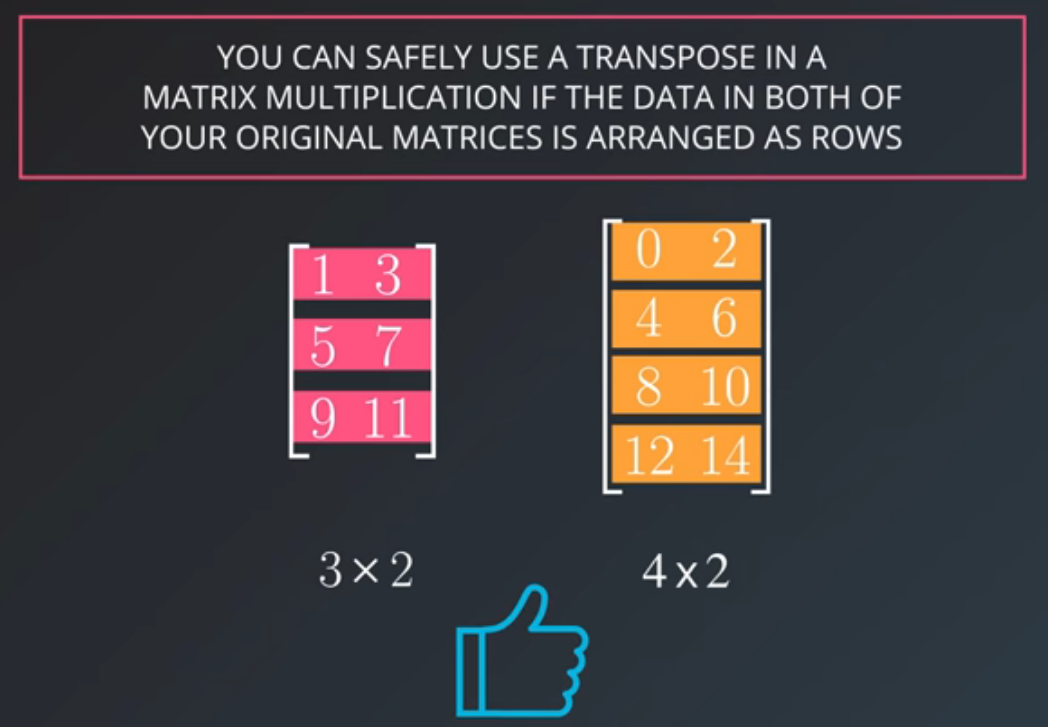

For example:

In [19]:
m = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
m

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [20]:
m.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

NumPy does this without actually moving any data in memory - it simply changes the way it indexes the original matrix - so it’s quite efficient.

However, that also means you need to be careful with how you modify objects, because they are sharing the same data. For example, with the same matrix `m` from above, let's make a new variable `m_t` that stores `m`'s transpose. Then look what happens if we modify a value in `m_t`:

In [21]:
m_t = m.T
m_t[3][1] = 200
m_t

array([[  1,   5,   9],
       [  2,   6,  10],
       [  3,   7,  11],
       [  4, 200,  12]])

In [22]:
m

array([[  1,   2,   3,   4],
       [  5,   6,   7, 200],
       [  9,  10,  11,  12]])

Notice how it modified both the transpose and the original matrix, too! That's because they are sharing the same copy of data. So remember to consider the transpose just as a different view of your matrix, rather than a different matrix entirely.

### A real use case
I don't want to get into too many details about neural networks because you haven't covered them yet, but there is one place you will almost certainly end up using a transpose, or at least thinking about it.

Let's say you have the following two matrices, called `inputs` and `weights`,

In [23]:
inputs = np.array([[-0.27,  0.45,  0.64, 0.31]])
inputs

array([[-0.27,  0.45,  0.64,  0.31]])

In [24]:
inputs.shape

(1, 4)

In [26]:
weights = np.array([[0.02, 0.001, -0.03, 0.036], \
                    [0.04, -0.003, 0.025, 0.009], \
                    [0.012, -0.045, 0.28, -0.067]])

weights

array([[ 0.02 ,  0.001, -0.03 ,  0.036],
       [ 0.04 , -0.003,  0.025,  0.009],
       [ 0.012, -0.045,  0.28 , -0.067]])

In [27]:
weights.shape

(3, 4)

I won't go into what they're for because you'll learn about them later, but you're going to end up wanting to find the **matrix product** of these two matrices.

If you try it like they are now, you get an error:

In [28]:
np.matmul(inputs, weights)

ValueError: shapes (1,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)

If you did the matrix multiplication lesson, then you've seen this error before. It's complaining of incompatible shapes because the number of columns in the left matrix, `4`, does not equal the number of rows in the right matrix, `3`.

So that doesn't work, but notice if you take the transpose of the `weights` matrix, it will:

In [29]:
np.matmul(inputs, weights.T)

array([[-0.01299,  0.00664,  0.13494]])

It also works if you take the transpose of `inputs` instead and swap their order, like we showed in the video:

In [30]:
np.matmul(weights, inputs.T)

array([[-0.01299],
       [ 0.00664],
       [ 0.13494]])

The two answers are transposes of each other, so which multiplication you use really just depends on the shape you want for the output.

# NumPy Exam
This is just a short programming quiz that asks you use a few NumPy features. It is meant to give you a little practice if you don't have NumPy experience.

In [38]:
# Use the numpy library
import numpy as np


def prepare_inputs(inputs):
    # TODO: create a 2-dimensional ndarray from the given 1-dimensional list;
    #       assign it to input_array
    input_array = np.array([inputs])
    # input_array = np.array(inputs)
    
    # TODO: find the minimum value in input_array and subtract that
    #       value from all the elements of input_array. Store the
    #       result in inputs_minus_min
    inputs_minus_min = input_array - np.min(input_array)
    

    # TODO: find the maximum value in inputs_minus_min and divide
    #       all of the values in inputs_minus_min by the maximum value.
    #       Store the results in inputs_div_max.
    inputs_div_max = inputs_minus_min / np.max(inputs_minus_min)

    # return the three arrays we've created
    return input_array, inputs_minus_min, inputs_div_max
    

def multiply_inputs(m1, m2):
    # TODO: Check the shapes of the matrices m1 and m2. 
    #       m1 and m2 will be ndarray objects.
    #
    #       Return False if the shapes cannot be used for matrix
    #       multiplication. You may not use a transpose
    if m1.shape[0] != m2.shape[1] and m1.shape[1] != m2.shape[0]:     
        return False


    # TODO: If you have not returned False, then calculate the matrix product
    #       of m1 and m2 and return it. Do not use a transpose,
    #       but you swap their order if necessary
    if m1.shape[1] == m2.shape[0]:
        return np.matmul(m1, m2)        
    else:
        return np.matmul(m2, m1)
    

def find_mean(values):
    # TODO: Return the average of the values in the given Python list
    return np.mean(values)

In [39]:
input_array, inputs_minus_min, inputs_div_max = prepare_inputs([-1,2,7])

In [40]:
input_array.shape

(1, 3)

In [45]:
np.array([[1,2,3],[4,5,6]]).shape[1] != np.array([[1],[2],[3],[4]]).shape[0]

True

In [46]:
np.array([[1,2,3],[4,5,6]]).shape[0] != np.array([[1],[2],[3],[4]]).shape[1]

True

In [34]:
print("Input as Array: {}".format(input_array))
print("Input minus min: {}".format(inputs_minus_min))
print("Input  Array: {}".format(inputs_div_max))

print("Multiply 1:\n{}".format(multiply_inputs(np.array([[1,2,3],[4,5,6]]), 
                                               np.array([[1],[2],[3],[4]]))))
print("Multiply 2:\n{}".format(multiply_inputs(np.array([[1,2,3],[4,5,6]]), 
                                               np.array([[1],[2],[3]]))))
print("Multiply 3:\n{}".format(multiply_inputs(np.array([[1,2,3],[4,5,6]]), 
                                               np.array([[1,2]]))))

print("Mean == {}".format(find_mean([1,3,4])))

Input as Array: [-1  2  7]
Input minus min: [0 3 8]
Input  Array: [0.    0.375 1.   ]
Multiply 1:
False
Multiply 2:
[[14]
 [32]]
Multiply 3:
[[ 9 12 15]]
Mean == 2.6666666666666665
